In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear')

In [7]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
clf.C = 1.0
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.956140350877193

In [9]:
clf.C = 100.0
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9736842105263158

In [10]:
C_range = [1e-5, 1e-3, 1e-2, 1, 1e2, 1e5, 1e10]

In [11]:
C_range_exp = np.arange(-15.0,21.0)
C_range = 10**C_range_exp

In [12]:
C_range

array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16,
       1.e+17, 1.e+18, 1.e+19, 1.e+20])

In [13]:
 # 警告を非表示にする（追加コード）
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [14]:
from sklearn.model_selection import GridSearchCV

param = {'C':C_range}

gs = GridSearchCV(clf,param,return_train_score=True)
gs.fit(X_train, y_train)

C:\Users\NDA04\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=100.0, class_weight=None,
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16,
       1.e+17, 1.

In [15]:
gs.cv_results_

{'mean_fit_time': array([0.00200144, 0.00100136, 0.00133419, 0.00100025, 0.0013303 ,
        0.00132823, 0.00099182, 0.0009981 , 0.00099937, 0.00099134,
        0.0006698 , 0.00100509, 0.00133316, 0.0013334 , 0.00133411,
        0.00166074, 0.00200486, 0.00299962, 0.00333484, 0.00499932,
        0.00666451, 0.02668905, 0.02034076, 0.02066628, 0.01799854,
        0.01466878, 0.01433484, 0.01399859, 0.0283254 , 0.02034068,
        0.01166836, 0.01533437, 0.0160025 , 0.0173339 , 0.01266718,
        0.01799814]),
 'std_fit_time': array([5.92486026e-06, 4.96689478e-06, 4.66312732e-04, 7.86741172e-07,
        4.73458013e-04, 4.75445505e-04, 8.27510555e-06, 4.00057251e-06,
        8.82757109e-06, 2.93942166e-06, 4.73637548e-04, 9.34676515e-06,
        4.71095659e-04, 4.72101712e-04, 4.71763734e-04, 4.66493407e-04,
        8.21115040e-04, 7.86741172e-07, 4.73675191e-04, 1.41489792e-03,
        2.49476863e-03, 1.85546461e-02, 1.53652440e-02, 2.07442295e-02,
        1.91321327e-02, 1.36989124e-0

In [16]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'C': 10.0},
 0.967032967032967,
 LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False))

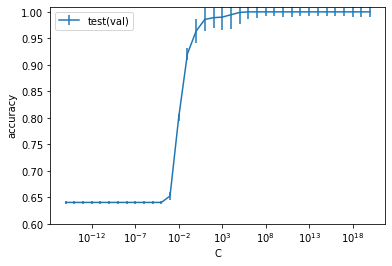

In [17]:
plt.errorbar(gs.cv_results_['param_C'].data,
             gs.cv_results_['mean_train_score'],
             yerr=gs.cv_results_['std_test_score'],
             label="test(val)")

plt.ylim(.6, 1.01)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend(loc="best");

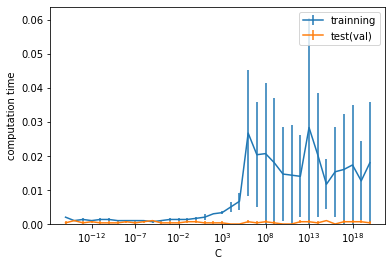

In [19]:
plt.errorbar(gs.cv_results_['param_C'].data,
             gs.cv_results_['mean_fit_time'],
             yerr=gs.cv_results_['std_fit_time'],
             label="trainning")

plt.errorbar(gs.cv_results_['param_C'].data,
             gs.cv_results_['mean_score_time'],
             yerr=gs.cv_results_['std_score_time'],
             label="test(val)")

plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("computation time")
plt.legend(loc="best");

In [20]:
from sklearn.svm import SVC

clf = SVC(gamma='auto')

C_range_exp = np.arange(-2.0, 5.0)
C_range = 10 ** C_range_exp

param = {'C': C_range,
         'kernel': ['linear', 'rbf']}

gs = GridSearchCV(clf, param, n_jobs=-1, verbose=2, return_train_score=True)
gs.fit(X_train, y_train)

C:\Users\NDA04\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    3.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=2)

In [21]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'C': 100.0, 'kernel': 'rbf'},
 0.9714285714285714,
 SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False))

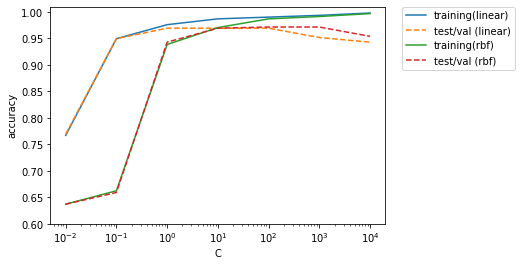

In [23]:
s_linear = (gs.cv_results_['param_kernel']=='linear').data

plt.plot(gs.cv_results_['param_C'][s_linear].data,
         gs.cv_results_['mean_train_score'][s_linear],
         label="training(linear)")

plt.plot(gs.cv_results_['param_C'][s_linear].data,
         gs.cv_results_['mean_test_score'][s_linear],
         linestyle="--",
         label="test/val (linear)")

s_rbf = (gs.cv_results_['param_kernel']=='rbf').data

plt.plot(gs.cv_results_['param_C'][s_rbf].data,
         gs.cv_results_['mean_train_score'][s_rbf],
         label="training(rbf)")

plt.plot(gs.cv_results_['param_C'][s_rbf].data,
         gs.cv_results_['mean_test_score'][s_rbf],
         linestyle="--",
         label="test/val (rbf)")


plt.ylim(.6, 1.01)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

In [24]:
gs.score(X_test, y_test)

0.9649122807017544

In [25]:
SVC(kernel='rbf').gamma

'auto_deprecated'

In [26]:
from sklearn.svm import SVC

clf = SVC(gamma='auto')

C_range_exp = np.arange(-2.0, 10.0)
C_range = 10 ** C_range_exp

gamma_range_exp = np.arange(-10.0, 0.0, 3)
gamma_range = 10 ** gamma_range_exp

param = [ {'C': C_range,
           'kernel': ['linear']},
         
          {'C': C_range,
           'gamma': gamma_range, 
           'kernel': ['rbf']} ]

gs = GridSearchCV(clf, param, n_jobs=-1, verbose=2, return_train_score=True)
gs.fit(X_train, y_train)

C:\Users\NDA04\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    3.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09]),
                          'kernel': ['linear']},
                         {'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09]),
                          'gamma': array([1.e-10, 1.e-07, 1.e-04, 1.e-01]),
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=No

In [27]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'},
 0.9736263736263736,
 SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False))

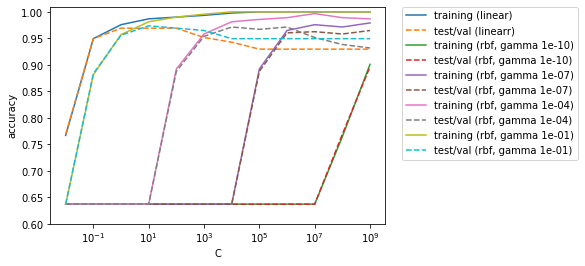

In [28]:
s_linear = (gs.cv_results_['param_kernel']=='linear').data

plt.plot(gs.cv_results_['param_C'][s_linear].data, 
         gs.cv_results_['mean_train_score'][s_linear],
         label="training (linear)")

plt.plot(gs.cv_results_['param_C'][s_linear].data, 
         gs.cv_results_['mean_test_score'][s_linear],
         linestyle="--",
         label="test/val (linearr)")





s_rbf = (gs.cv_results_['param_kernel']=='rbf').data

for g in gamma_range:
    s_gamma = (gs.cv_results_['param_gamma'][s_rbf].data == g)

    plt.plot(gs.cv_results_['param_C'][s_rbf][s_gamma].data, 
             gs.cv_results_['mean_train_score'][s_rbf][s_gamma],
             label="training (rbf, gamma {0:.0e})".format(g))
    
    plt.plot(gs.cv_results_['param_C'][s_rbf][s_gamma].data, 
             gs.cv_results_['mean_test_score'][s_rbf][s_gamma],
             linestyle="--",
             label="test/val (rbf, gamma {0:.0e})".format(g))

plt.ylim(.6, 1.01)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [31]:
gs.score(X_test, y_test)

0.9649122807017544

In [30]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

In [32]:
param = {'n_neighbors': range(1,20) }

gs = GridSearchCV(clf, param, return_train_score=True)
gs.fit(X_train, y_train)

C:\Users\NDA04\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(1, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [33]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'n_neighbors': 5},
 0.9648351648351648,
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'))

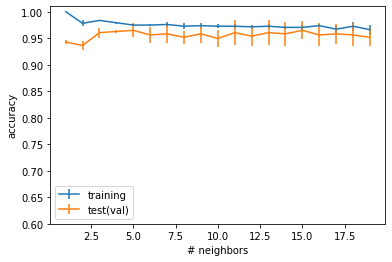

In [34]:
plt.errorbar(gs.cv_results_['param_n_neighbors'].data, 
             gs.cv_results_['mean_train_score'], 
             yerr=gs.cv_results_['std_train_score'],
             label="training")

plt.errorbar(gs.cv_results_['param_n_neighbors'].data,
             gs.cv_results_['mean_test_score'], 
             yerr=gs.cv_results_['std_test_score'],
             label="test(val)")

plt.ylim(.6, 1.01)
plt.xlabel("# neighbors")
plt.ylabel("accuracy")
plt.legend(loc="best");

In [35]:
gs.score(X_test, y_test)

0.956140350877193

In [36]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter=2000)
clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=2000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [37]:
param = {'hidden_layer_sizes': [(10,), (50,), (100,),
                                (10,10,), (50,50,), (100,100,),
                                (10, 5,), (5,5,), (30, 20, 10),
                                (100,1000,50,), (1000,100,50,),
                                (10,10,10), (50,50,50), (100,100,100,),
                                ],
          'activation' : ['identity', 'logistic', 'tanh', 'relu'],
          'beta_1' : [0.9, 0.8, 0.7, 0.6, 0.5],
          'beta_2' : [0.999, 0.9, 0.8, 0.7],
          'alpha' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
        }

In [38]:
gs = GridSearchCV(clf, param, n_jobs=-1, verbose=1, return_train_score=True)
# gs.fit(X_train, y_train)

# # Fitting 3 folds for each of 6720 candidates, totalling 20160 fits

In [39]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(clf, param,
                        n_iter=20, 
                        n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

C:\Users\NDA04\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   39.3s finished
C:\Users\NDA04\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_iter=2000, momentum=0.9,
                                           n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0....
                                        'alpha': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1, 1],
                                        'beta_1': [0.9, 0.8, 0.7, 0.6, 0.5],
          

In [40]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'hidden_layer_sizes': (50, 50),
  'beta_2': 0.8,
  'beta_1': 0.7,
  'alpha': 0.0001,
  'activation': 'logistic'},
 0.9736263736263736,
 MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
               beta_1=0.7, beta_2=0.8, early_stopping=False, epsilon=1e-08,
               hidden_layer_sizes=(50, 50), learning_rate='constant',
               learning_rate_init=0.001, max_iter=2000, momentum=0.9,
               n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
               random_state=None, shuffle=True, solver='adam', tol=0.0001,
               validation_fraction=0.1, verbose=False, warm_start=False))

In [41]:
gs.score(X_test, y_test)

0.9649122807017544